# Vader Sentiment Analysis Results
This notebook takes you through visualizing the data created using the "vaderSentimentData" notebook as a bar graph.

For more information about how Vader works behind the scenes see here: https://github.com/cjhutto/vaderSentiment

###  Before we begin
Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (ReD)](https://kb.iu.edu/d/apum). You will also need to have access to ReD through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-Py.ipynb](https://github.com/cyberdh/Text-Analysis/blob/drafts/textPrep-Py.ipynb) before you proceed further. The textPrep-Py notebook provides information and resources on how to get a Carbonate account, how to set up ReD, and how to get started using the Jupyter Notebook on ReD.

### Run CyberDH environment
The code in the cell below points to a Python environment specificaly for use with the Python Jupyter Notebooks created by Cyberinfrastructure for Digital Humanities. It allows for the use of the different packages in our notebooks and their subsequent data sets.

##### Packages
- **sys:** Provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.
- **os:** Provides a portable way of using operating system dependent functionality.

#### NOTE: This cell is only for use with Research Desktop. You will get an error if you try to run this cell on your personal device!!

In [1]:
import sys
import os
sys.path.insert(0,"/N/u/cyberdh/Carbonate/dhPyEnviron/lib/python3.6/site-packages")
os.environ["NLTK_DATA"] = "/N/u/cyberdh/Carbonate/dhPyEnviron/nltk_data"

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download.

In your terminal, packages can be installed by simply typing `pip install nameofpackage --user`. However, since you are using ReD and our Python environment, you will not need to install any of the packages below to use this notebook. Anytime you need to make use of a package, however, you need to import it so that Python knows to look in these packages for any functions or commands you use. Below is a brief description of the packages we are using in this notebook:     

- **pickle:** Implements binary protocols for serializing and de-serializing a Python object structure. "Pickling" is the process whereby a Python object hierarchy is converted into a byte stream, and "unpickling" is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

- **pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **os:** This module provides a portable way of using operating system dependent functionality.

- **matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

- **collections:** Implements specialized container datatypes providing alternatives to Python's general purpose built-in containers, dict, list, set, and tuple.

- **math:** Provides access to the mathematical functions defined by the C standard.

Notice we import some of the packages differently. In some cases we just import the entire package when we say `import XYZ`. For some packages which are small, or, from which we are going to use a lot of the functionality it provides, this is fine. 

Sometimes when we import the package directly we say `import XYZ as X`. All this does is allow us to type `X` instead of `XYZ` when we use certain functions from the package. So we can now say `X.function()` instead of `XYZ.function()`. This saves time typing and eliminates errors from having to type out longer package names. I could just as easily type `import XYZ as potato` and whenever I use a function from the `XYZ` package I would need to type `potato.function()`. What we import the package as is up to you, but some commonly used packages have abbreviations that are standard amongst Python users such as `import pandas as pd` or `import matplotlib.pyplot as plt`. You do not need to us `pd` or `plt`, however, these are widely used and using something else could confuse other users and is generally considered bad practice. 

Other times we import only specific elements or functions from a package. This is common with packages that are very large and provide a lot of functionality, but from which we are only using a couple functions or a specific subset of the package that contains the functionality we need. This is seen when we say `from XYZ import ABC`. This is saying I only want the `ABC` function from the `XYZ` package. Sometimes we need to point to the specific location where a function is located within the package. We do this by adding periods in between the directory names, so it would look like `from XYZ.123.A1B2 import LMN`. This says we want the `LMN` function which is located in the `XYZ` package and then the `123` and `A1B2` directory in that package. 

You can also import more than one function from a package by separating the functions with commas like this `from XYZ import ABC, LMN, QRS`. This imports the `ABC`, `LMN` and `QRS` functions from the `XYZ` package.

In [2]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import math

### File paths
Here we assign file paths we will need throughout this notebook to variables. This way we only need to make changes here and they will be implemeneted throughout the code. The `homePath` variable uses the `environ` function from the `os` package. This function points to your home directory no matter your operating system (Linux, osX, Windows).

Then we join the `homePath` variable to folders that point to where our visualization and .csv output will be saved and we assign this file path to the variable `dataResults`. The folder names are in quotes and separated by a comma. 

Finally, we again use the `homePath` variable and join it with a file path that points to a folder where we load our data created by the "vaderSentimentData" notebook. We assign this file path to a variable called `dataClean`.

You can change any of these to better match where your data can be found (`dataClean`) and where you want any output such as '.csv' files or images to be saved (`dataResults`).

In [3]:
homePath = os.environ['HOME']
dataResults = os.path.join(homePath, "Text-Analysis-master","Output")
dataClean = os.path.join(homePath,"Text-Analysis-master","VADERSentimentAnalysis", "cleanedData")

### Load data

Here we use the pickle package to load in the data created by the "vaderSentimentData" notebook. The names in quotes match the file names of the corresponding data, so if you changed these names in the "vaderSentimentData" notebook you will need to change the names here to match. Otherwise the default file names here match the default file names given in the "vaderSentimentData" notebook.

In [4]:
with open(os.path.join(dataClean, "vaderScores"), "rb") as vaderScore:
    res = pickle.load(vaderScore)
with open(os.path.join(dataClean, "total"), "rb") as vaderTotal:
    total = pickle.load(vaderTotal)
with open(os.path.join(dataClean, "scores"), "rb") as s:
    scores = pickle.load(s)
with open(os.path.join(dataClean, "numberOfText"), "rb") as nt:
    numberOfTweets = pickle.load(nt)
with open(os.path.join(dataClean, "squared"), "rb") as squared:
    totalSquared = pickle.load(squared)


print(res)

{'-1': 43, '-.9': 2005, '-.8': 231, '-.7': 265, '-.6': 628, '-.5': 1728, '-.4': 625, '-.3': 681, '-.2': 524, '-.1': 216, '0': 6328, '.1': 158, '.2': 153, '.3': 207, '.4': 225, '.5': 392, '.6': 144, '.7': 92, '.8': 194, '.9': 40, '1': 8}


Now we use the math package to calcualte the `mean` and the standard deviation (`std`) of our sentiment scores.

In [5]:
mean = total / numberOfTweets
std = math.sqrt(totalSquared / numberOfTweets) - mean**2

Here we save the results of the `mean`, `std`, and `numberOfTweets` as a text file. The only changes you will need to make are to the file name in the first line. This is the name you would like to use to save your .txt file.

In [6]:
with open(os.path.join(dataResults, 'VADERCombinedRawData.txt'), 'w') as write_file:
    write_file.write(str(res))
    write_file.write("\nMean: " + str(mean))
    write_file.write("\nStandard Deviation: " + str(std))
    write_file.write("\nNumber of Tweets: " +str(numberOfTweets))

### Plot the graph

Here we plot the graph. We begin by assigning important parameters to variables. This allows you to make necessary changes and adjustments in one place without having to search through the code.

To start we assign some values regarding our output file to some variables. First, we assign the file name for our '.png' image output file to the variable `vaderBarOutput`. You may wish to change the file name to better fit your dataset. Then we assign a file format to the variable `fmt`. You may change this to '.jpg' or even '.svg', but remember to change the file type in the file name assigned to `vaderBarOutput` just before it. Now we choose the resolution of our output file and assign it to the variable `dpi`.

Now we choose a color for the bars of our bar graph. We assign the color to the variable `color`. It is currently set to `['red']`, but you can adjust it to better fit your needs.

Next we choose a figure size and assign it to the variable `figSz`. The first number in the parantheses is the width, followed by the height.

Next we choose some font sizes. The `labelFont` is where we assign the font size for the x and y axis as well as the main title. The `tickFont` variable is where we assign the font size for the ticks on the x axis. The `fontPct` is where we set the font size for the percentage markers above the each bar in the graph.

Then we choose some labels for our graph. Remember to always put the label in quotes so it is marked as a string. The `labelX` variable is where we assign a title for the x axis of the graph. The `labelY` variable is where we assign a title for the y axis (left side) of the graph. The `labelTitle` is where we assign the main title of the graph. Notice the `\n'+ 'Mean = {0:.2f}'.format(mean) + ', ' + 'Std = {0:.2f}'.format(std) +', ' + "Number of Tweets = {:,}".format(numberOfTweets)` in the title. This puts the results of the mean, standard deviation, and number of tweets in the title.

The `rotate` variable is where we set the angle of rotation of the percent labels over the bars of the bar graph. We currently have the rotation set to 45 degrees, but this may not work for your dataset, so feel free to adjust it if needed.

Now run the code and plot your graph!

   score  count
0     -1     43
1    -.9   2005
2    -.8    231
3    -.7    265
4    -.6    628
5    -.5   1728
6    -.4    625
7    -.3    681
8    -.2    524
9    -.1    216
10     0   6328
11    .1    158
12    .2    153
13    .3    207
14    .4    225
15    .5    392
16    .6    144
17    .7     92
18    .8    194
19    .9     40
20     1      8


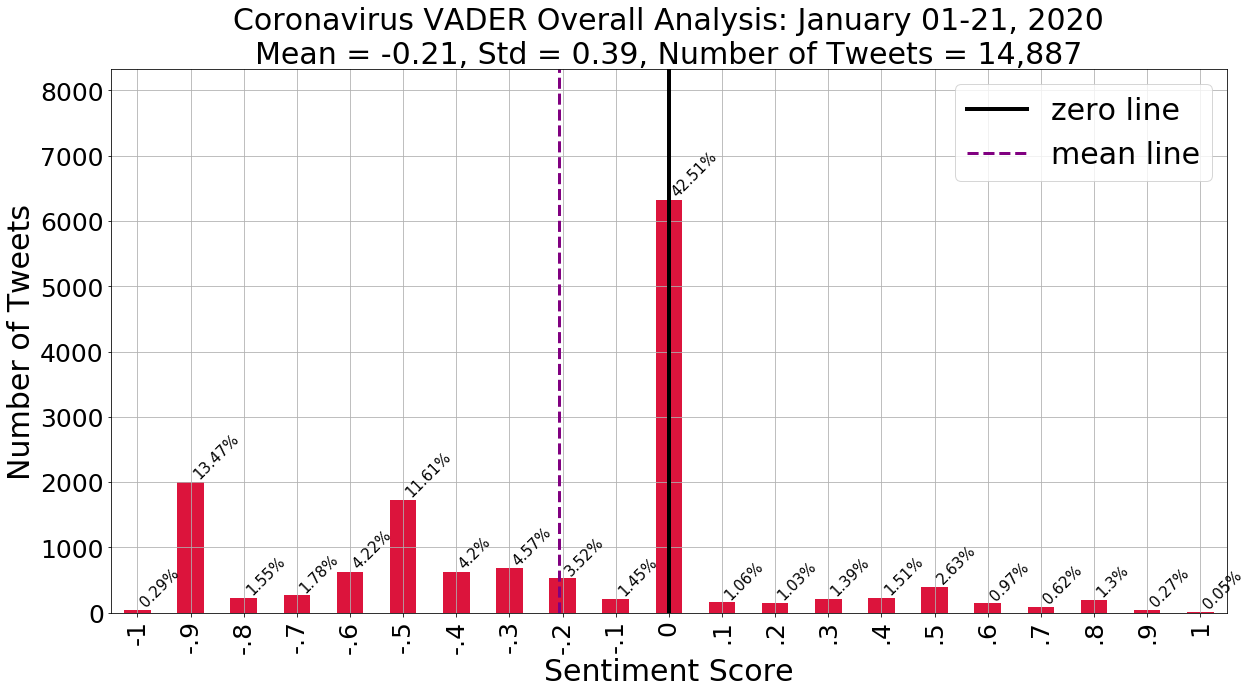

In [7]:
# Variables
vaderBarOutput = 'vaderBarGraph.png'
fmt = 'png'
dpi = 300
color = ["crimson"]
figSz = (20,10)
fontLabel = 30
fontTick = 25
fontPct = 15
labelX = 'Sentiment Score'
labelY = 'Number of Tweets'
labelTitle = 'Coronavirus VADER Overall Analysis: January 01-21, 2020\n'
rotate = 45

# Plot graph   
%matplotlib inline
cres = Counter(res)
resdf = pd.DataFrame.from_dict(cres, orient='index').reset_index()
resdf = resdf.rename(columns={'index':'score', 0:'count'})
total = resdf['count'].sum()

print(resdf)

fig = resdf.plot(x='score',kind='bar', align = 'center', color = color, grid = True, legend = None, figsize=figSz)
fig.set_ylabel(labelY, fontsize = fontLabel)
fig.set_xlabel(labelX, fontsize = fontLabel)
fig.set_title(labelTitle + 'Mean = {0:.2f}'.format(mean) + ', ' + 'Std = {0:.2f}'.format(std) +', ' + "Number of Tweets = {:,}".format(numberOfTweets),fontsize = fontLabel)
fig.set_ylim(0,2000 + max(res.values()))

rects = fig.patches

# vertical line for 0
zeroLine = plt.axvline(x = 10, color = 'black', linewidth = 4)

# vertical line for mean
meanLine = plt.axvline(x = mean*10+10, color = 'purple', linestyle = 'dashed', linewidth = 3)

plt.legend((zeroLine, meanLine), ['zero line', 'mean line'], prop={'size' : fontLabel}, loc = 'upper right')

# Now make some labels

plt.tick_params(axis = 'both', which = 'major', labelsize = fontTick)

labels =round((resdf['count']/total) * 100, 2).astype(str)+'%'

for rect, label in zip(rects, labels):
    height = rect.get_height()
    fig.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='left', fontsize = fontPct, va='bottom', rotation = rotate)
    
plt.savefig(os.path.join(dataResults,vaderBarOutput), format=fmt, dpi=dpi, bbox_inches='tight')

plt.show()

## VOILA!!

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.